# Обработка коммон-кейсов для обоих пулов

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../processed_data/10-concated.csv')
print(df.shape)

(98660, 73)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98660 entries, 0 to 98659
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         98660 non-null  uint64 
 1   org_id                          98660 non-null  uint64 
 2   rating                          98660 non-null  float64
 3   ts                              98660 non-null  int64  
 4   user_city                       98660 non-null  object 
 5   org_city                        98660 non-null  object 
 6   average_bill                    60620 non-null  float64
 7   rating_org                      98660 non-null  float64
 8   rubrics                         98660 non-null  object 
 9   food_delivery                   98660 non-null  int64  
 10  breakfast                       98660 non-null  int64  
 11  takeaway                        98660 non-null  int64  
 12  summer_terrace                  

In [4]:
df.describe()

,user_id,org_id,rating,ts,average_bill,rating_org,food_delivery,breakfast,takeaway,summer_terrace,...,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,accepted_credit_cards,kalyan,teahouse,bread_from_tandoor,handmade_goods
count,9.866000e+04,9.866000e+04,98660.000000,98660.000000,60620.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,...,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000,98660.000000
mean,9.196190e+18,9.050700e+18,4.322481,715.047172,1083.314088,3.239499,0.758504,0.577509,0.650760,0.603061,...,0.008007,0.007460,0.017849,0.002169,0.002321,0.001014,0.000983,0.001287,0.002757,0.001155
std,5.315843e+18,5.272360e+18,1.130019,293.314486,2976.134950,1.889331,0.427992,0.493958,0.476732,0.489266,...,0.089125,0.086049,0.132404,0.046523,0.048122,0.031821,0.031340,0.035855,0.052434,0.033973
min,1.445171e+14,1.626686e+15,1.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604080e+18,4.540661e+18,4.000000,505.000000,500.000000,0.750000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.203901e+18,9.104453e+18,5.000000,699.000000,1000.000000,4.256959,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.377072e+19,1.351377e+19,5.000000,958.000000,1000.000000,4.476636,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.844666e+19,1.844622e+19,5.000000,1216.000000,250000.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)

In [6]:
df.ts.max() / 365

3.3315068493150686

In [7]:
monthes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
def monthes_from_2018(ts):
  i = 0
  res = 0
  while ts >= monthes[i]:
    ts -= monthes[i]
    i = (i + 1) % 12
    res += 1
  return 'M' + str(res)

df = df.assign(
  dateMM=df.apply(lambda row: monthes_from_2018(row.ts), axis=1)
)

In [8]:
print(df.average_bill.isna().sum())
df['average_bill'] = df['average_bill'].fillna(df.groupby('user_id')['average_bill'].transform('mean'))
print(df.average_bill.isna().sum())
df['average_bill'] = df['average_bill'].fillna(
  df.groupby(['dateMM', 'org_city'])['average_bill'].transform('mean'))
print(df.average_bill.isna().sum())

38040
33963
0


(array([9.8563e+04, 7.0000e+01, 8.0000e+00, 8.0000e+00, 0.0000e+00,
        0.0000e+00, 7.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([   500.,  25450.,  50400.,  75350., 100300., 125250., 150200.,
        175150., 200100., 225050., 250000.]),
 <BarContainer object of 10 artists>)

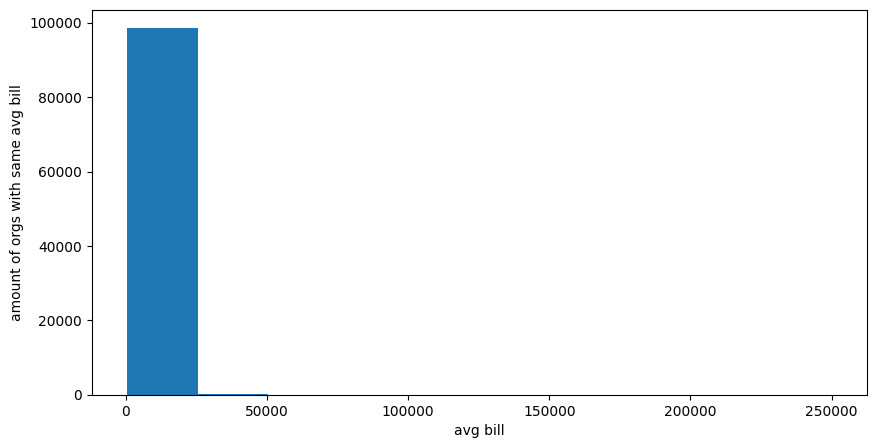

In [9]:
plt.xlabel('avg bill')
plt.ylabel('amount of orgs with same avg bill')
plt.hist(df.average_bill)

<AxesSubplot: xlabel='avg bill', ylabel='amount of orgs with same avg bill'>

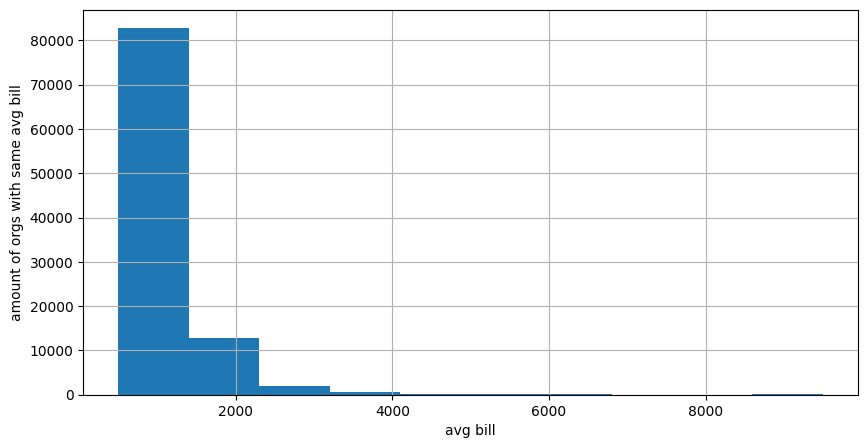

In [10]:
plt.xlabel('avg bill')
plt.ylabel('amount of orgs with same avg bill')
df1 = df[df.average_bill < 10000]
df1.average_bill.hist()

<AxesSubplot: xlabel='avg bill', ylabel='amount of orgs with same avg bill'>

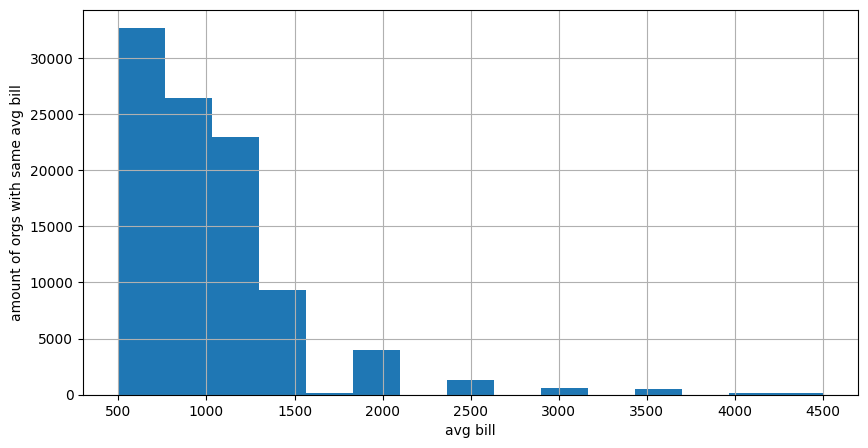

In [11]:
plt.xlabel('avg bill')
plt.ylabel('amount of orgs with same avg bill')
df1 = df[df.average_bill < 5000]
df1.average_bill.hist(bins=15)

In [12]:
df = df.assign(
  bill500=((df.average_bill <= 500)).astype(int),
  bill1000=((500 < df.average_bill) & (df.average_bill <= 1000)).astype(int),
  bill1500=((1000 < df.average_bill) & (df.average_bill <= 1500)).astype(int),
  bill2000=((1500 < df.average_bill) & (df.average_bill <= 2000)).astype(int),
  bill2500=((2000 < df.average_bill) & (df.average_bill <= 2500)).astype(int),
  bill3000=((2500 < df.average_bill) & (df.average_bill <= 3000)).astype(int),
  bill3500=((3000 < df.average_bill) & (df.average_bill <= 3500)).astype(int),
  bill4000=((3500 < df.average_bill) & (df.average_bill <= 4000)).astype(int),
  billExpensive=((4000 < df.average_bill)).astype(int)
)

In [13]:
df = df.assign(
  native_citizen=((df.user_city == df.org_city)).astype(int),
  tourist=((df.user_city != df.org_city)).astype(int)
)

In [14]:
df.rubrics.nunique()

14

<AxesSubplot: >

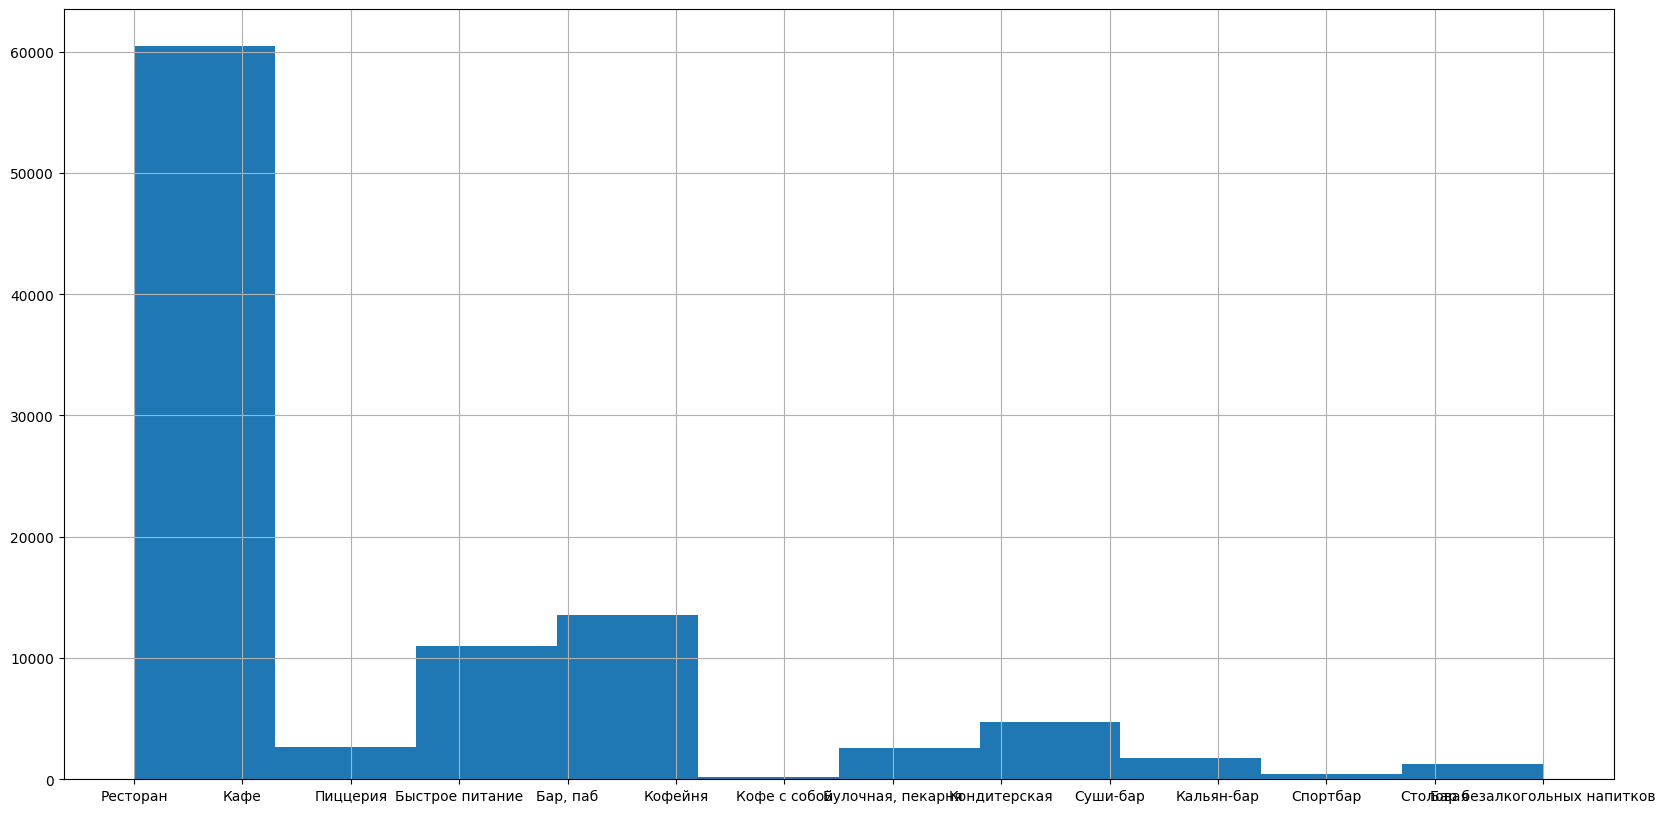

In [15]:
df.rubrics.hist(figsize=(20, 10))

In [16]:
df = df.assign(
  is_restraunt=((df.rubrics == 'Ресторан')).astype(int),
  is_caffe=((df.rubrics == 'Кафе')).astype(int),
  is_other=((df.rubrics != "Ресторан") & (df.rubrics != "Кафе")).astype(int)
)

<AxesSubplot: >

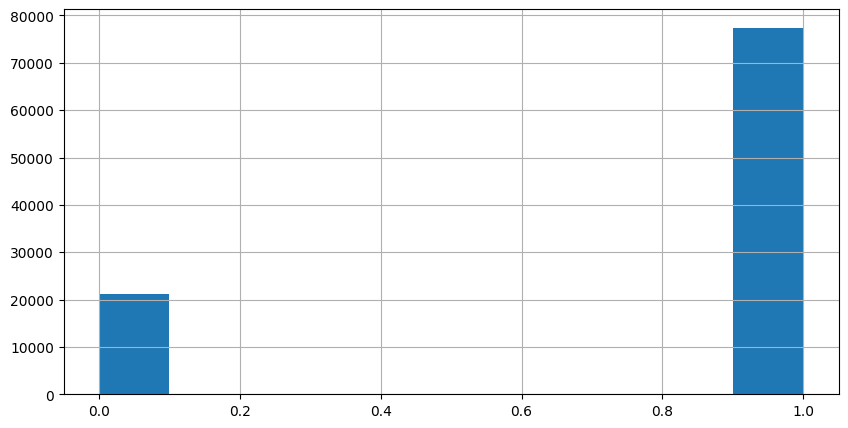

In [17]:
df = df.assign(
  resist_covid=((df.closed_for_quarantine == 0) | (df.online_takeaway == 1)).astype(int)
)
df.resist_covid.hist()

<AxesSubplot: >

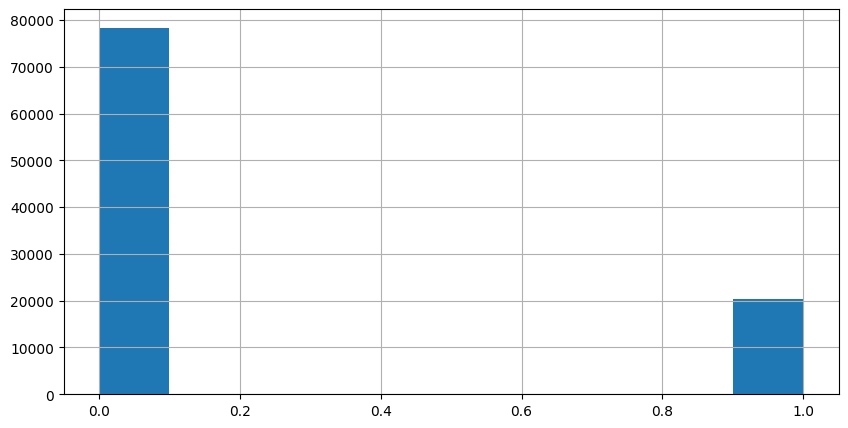

In [18]:
df = df.assign(
  for_adult=((df.craft_beer == 1) | (df.has_bar == 1) | (df.face_control == 1) | (df.strip == 1) | (df.vinotheque == 1) | (df.kalyan == 1)).astype(int)
)

df.for_adult.hist()

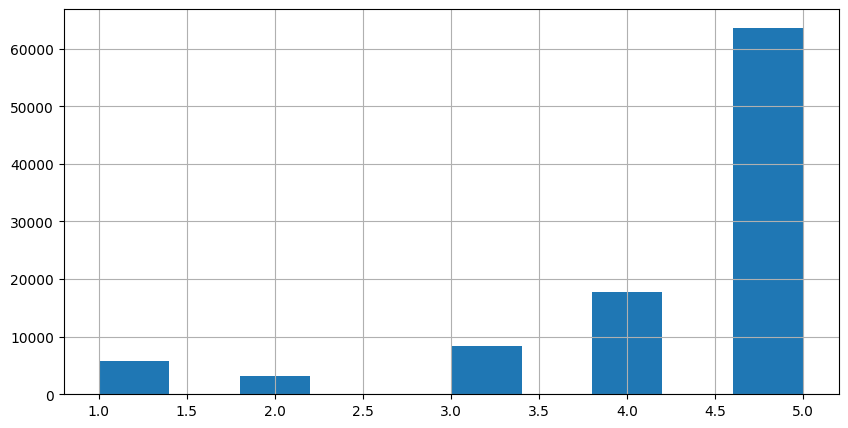

In [19]:
df.rating.hist()

df = df.assign(
  rating_1=((df.rating == 1.0)).astype(int),
  rating_2=((df.rating == 2.0)).astype(int),
  rating_3=((df.rating == 3.0)).astype(int),
  rating_4=((df.rating == 4.0)).astype(int),
  rating_5=((df.rating == 5.0)).astype(int)
)

In [20]:
df.to_csv('../../processed_data/11-pools.csv', index=False)